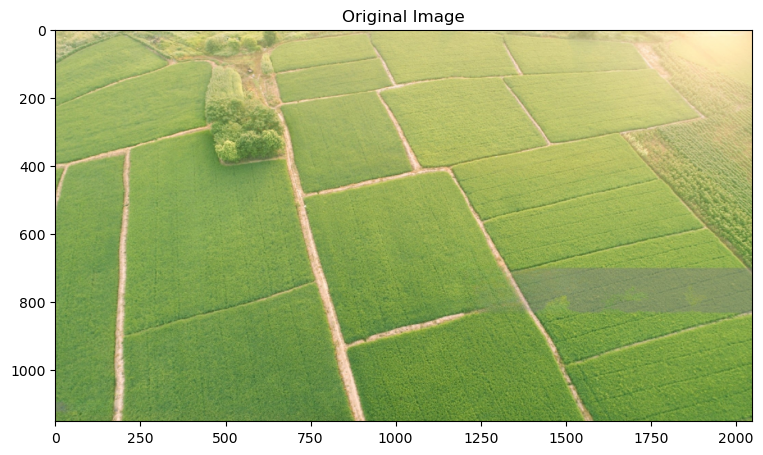

In [374]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Load & Show our input image
image = cv2.imread('C:/Users/USER/Desktop/Zh/University/Term6/Multimedia/HW/HW2/AerialView.jpeg')
imshow("Original Image", image)

In [375]:
# Make Picture Sharpen for Better Contouring
sharpKernel = np.array([[-1, -1, -1], 
                          [-1, 9, -1],
                          [-1, -1, -1]])
sharpen = cv2.filter2D(image, -1, sharpKernel)

# Change Contrast for Better Contouring
modified = cv2.convertScaleAbs(sharpen, alpha=1.5, beta=-100)

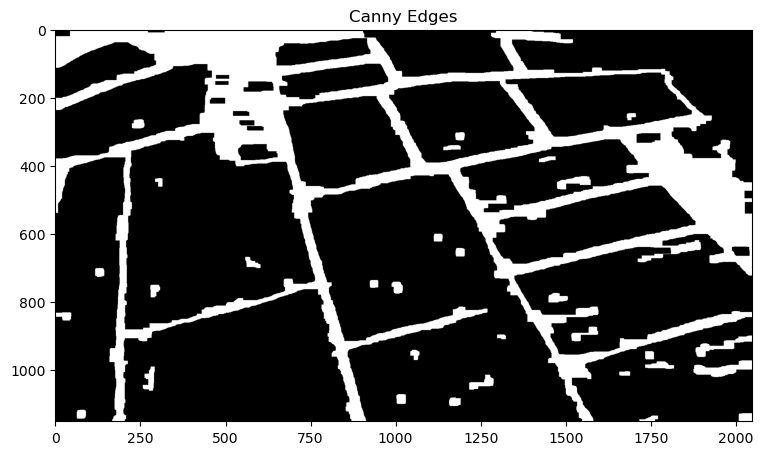

In [376]:
# Grayscale, Apply GaussianFilter & Morphology
gray = cv2.cvtColor(modified, cv2.COLOR_BGR2GRAY)
Gaussian = cv2.GaussianBlur(gray, (7, 7), 2)

kernel1 = np.ones([3, 3], dtype= float)
kernel2 = np.ones([20, 50], dtype= float)
kernel3 = np.ones([6, 20], dtype= float)
erode = cv2.erode(Gaussian, kernel1, iterations= 3)
Gaussian = cv2.GaussianBlur(erode, (7, 7), 2)
erode = cv2.erode(Gaussian, kernel1, iterations= 2)


# Find Canny Edges with alittle Morphology :) 
edged = cv2.Canny(erode, 20, 70)
edged = cv2.dilate(edged, kernel2, iterations= 1)
edged = cv2.erode(edged, kernel3, iterations= 2)

imshow('Canny Edges', edged)

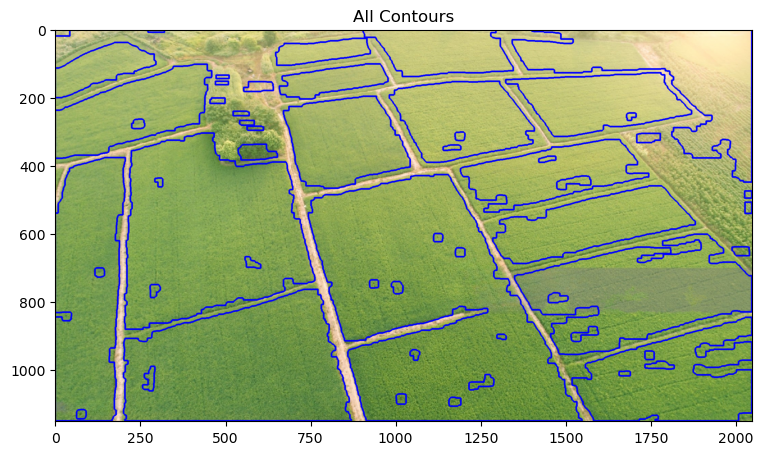

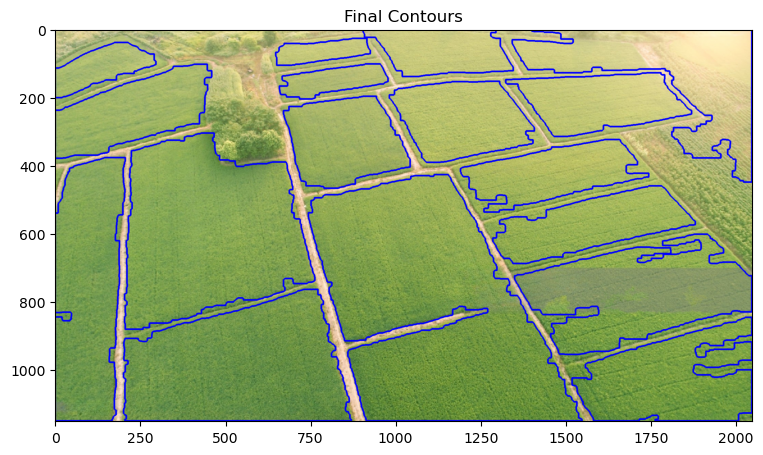

Number of contours found =  17


In [377]:
# Find Contours (First Step) 
contours, hierarchy = cv2.findContours(cv2.bitwise_not(edged.copy()), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw All Contours Over Blank Image
copy = image.copy()
cv2.drawContours(copy, contours, -1, (255, 0, 0), 3)
imshow('All Contours', copy)

# Delete Small Contours (Second Step) 
newContours = []
for i in contours:
    if cv2.contourArea(i) > 12000:
        newContours.append(i)

# Draw All Contours & Print How Many Were Found
cv2.drawContours(image, newContours, -1, (255, 0, 0), 3)
imshow('Final Contours', image)
print("Number of contours found = ", len(newContours))

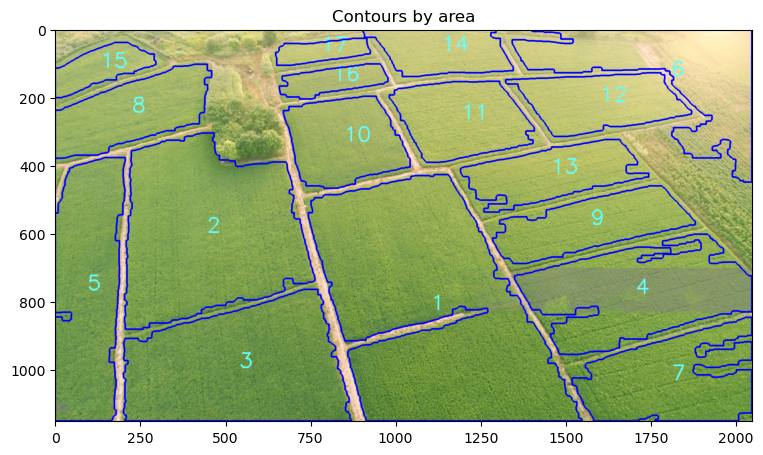

In [378]:
# Sorting by Area
# Function We'll Use to Display Contour Area
def get_contour_areas(newContours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in newContours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Sort contours large to small by area
sorted_contours = sorted(newContours, key=cv2.contourArea, reverse=True)

# Iterate Over Our Contours & Draw One at a Time
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 100), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow('Contours by area', image)